<a href="https://colab.research.google.com/github/sushily1997/ML_Assignments/blob/main/My_notes_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is LightGBM, How to implement it? How to fine tune the parameters**

**M**achine Learning is the fastest growing field in the world. Everyday there will be a launch of bunch of new algorithms, some of those fails and some achieve the peak of success. Today, We see one of the most successful machine learning algorithm, Light GBM.

#**What is Light GBM?**



**It is a gradient boosting framework that makes use of tree based learning algorithms** that is considered to be a very powerful algorithm when it comes to computation. It is considered to be a fast processing algorithm.

 

While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise. LightGBM chooses the leaf with large loss to grow. It can lower down more loss than a level wise algorithm when growing the same leaf.

**When to use LightGBM?**
 

LightGBM is not for a small volume of datasets. It can easily overfit small data due to its sensitivity. It can be used for data having more than 10,000+ rows. There is no fixed threshold that helps in deciding the usage of LightGBM. It can be used for large volumes of data especially when one needs to achieve a high accuracy.

**Key features of the LightGBM algorithm**

Here are some of the key features of LightGBM that make it one of the unique boosting algorithms:

* It takes care of the missing values automatically – that means we don’t need to do any preprocessing steps to handle missing values.

* It uses a histogram-based algorithm for splitting to create split points – split points are the feature values depending on which data is divided at a decision tree node.

* It uses Gradient-Based One Side Sampling (GOSS) which is a novel sampling way that downsamples the instances on basis of gradients.

* The decision trees in LightGBM are leaf-wise tree growth. The difference between leaf-wise tree growth and level-wise tree growth is that the leaf-wise strategy grows the tree by splitting the data at the nodes with the highest loss change, and the level-wise strategy grows the tree level by level.

* Another feature of LightGBM is that it uses the Exclusive Feature Bundle Technique, which is a near-lossless method to reduce the number of effective features.

* Faster training speed and higher efficiency. Lower memory usage and better accuracy.

**NOTE:** Some of the terms may not be clear right now, don’t worry we will explain them in the next section in more detail.



**Explanation of LightGBM algorithm**

LightGBM (Light Gradient Boosting Machine) is an open-source library that provides an efficient and effective implementation of the gradient-boosting algorithm.

**1)**The very first feature that has a key role in making LightGBM fast is histogram-based splitting. Let us take sample data to understand how the histogram-based splitting makes the algorithm faster. We assume that we have a dataset of salaries of a few employees.

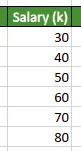

To create an optimal spit for a Decision tree, all the above values in the dataset will be tested. Suppose we have millions of data rows, then it takes a lot of time to test for the best split. The LightGBM solves this issue in an optimal way. It divides the dataset into different bins. For example, let’s say in our case, it divides the above dataset into two bins.

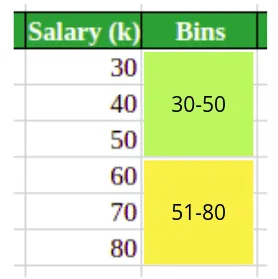

Now, instead of testing all the data points for the optimum splitting, the LighGBM will use the bins to find the optimum split which takes less time.

**2)**The second feature that has a great role in making the LightGBM faster is the Exclusive Feature Bundling (EFB) Technique. It helps to decrease features that are sparse. Exclusive Feature bundling (EFB) puts two features together and adds offset to every feature in feature bundles. For example, take the following categorical dataset about gender.

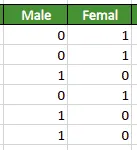



Notice that we have two columns that show the gender of a person. Instead of using both the columns, the EFB will use one column that will contain the same information as shown below:

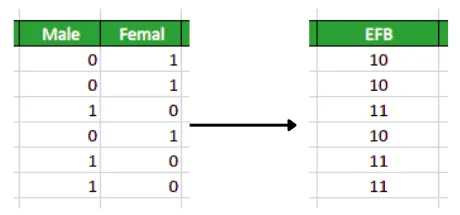

Note that the value for males is 10 and for females is 11. This is how the EFA reduces the features so that the model can easily be trained on the dataset.

**3)**The third main feature that brings more power to the LightGBM is the GOSS (Gradient-Based One Side Sampling). The gradient is simply a derivative or the function’s rate of change. The large value of the gradient shows more error. LightGBM uses the technique of Gradient-based One-Side Sampling to reduce the number of training examples. The GOSS keeps all the examples with large gradients (error) and conducts random sampling on the examples with small gradients. In other words, the models keep the observations/data points for the next iteration that has a high gradient value so that it can reduce the error.

**Can we use Light GBM everywhere?**

No, it is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data. Their is no threshold on the number of rows but my experience suggests me to use it only for data with 10,000+ rows.

Let’s start discussing parameters.

#**Parameters**
Control Parameters

**max_depth:** It describes the maximum depth of tree. This parameter is used to handle model overfitting. Any time you feel that your model is overfitted, my first advice will be to lower max_depth.

**min_data_in_leaf:** It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal over fitting

**feature_fraction:** Used when your boosting(discussed later) is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees.

**bagging_fraction:** specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.

**early_stopping_round:** This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations.

**lambda:** lambda specifies regularization. Typical value ranges from 0 to 1.

**min_gain_to_split:** This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree.

**max_cat_group:** When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries, default:64

**Core Parameters**

**Task:** It specifies the task you want to perform on data. It may be either train or predict.

**application:** This is the most important parameter and specifies the application of your model, whether it is a regression problem or classification problem. LightGBM will by default consider model as a regression model.

*   regression: for regression

*   binary: for binary classification 

*   multiclass: for multiclass classification problem

**boosting:** defines the type of algorithm you want to run, default=gdbt

*   gbdt: traditional Gradient Boosting Decision Tree

*   rf: random forest

* dart: Dropouts meet Multiple Additive Regression Trees

* goss: Gradient-based One-Side Sampling

**num_boost_round:** Number of boosting iterations, typically 100+

**learning_rate:** This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. Typical values: 0.1, 0.001, 0.003…

**num_leaves:** number of leaves in full tree, default: 31

**device:** default: cpu, can also pass gpu

**Metric parameter**

**metric:** again one of the important parameter as it specifies loss for model building. Below are few general losses for regression and classification.

* mae: mean absolute error
* mse: mean squared error
* binary_logloss: loss for binary classification
* multi_logloss: loss for multi classification

**IO parameter**

**max_bin:** it denotes the maximum number of bin that feature value will bucket in.

**categorical_feature:** It denotes the index of categorical features. If categorical_features=0,1,2 then column 0, column 1 and column 2 are categorical variables.

**ignore_column:** same as categorical_features just instead of considering specific columns as categorical, it will completely ignore them.

**save_binary:** If you are really dealing with the memory size of your data file then specify this parameter as ‘True’. Specifying parameter true will save the dataset to binary file, this binary file will speed your data reading time for the next time.

Knowing and using above parameters will definitely help you implement the model. Remember I said that implementation of LightGBM is easy but parameter tuning is difficult. So let’s first start with implementation and then I will give idea about the parameter tuning.

#**Implementation**
Installating LGBM:

**Dataset:**

This data is very small just 400 rows and 5 columns (specially used for learning purpose). This is a classification problem where we have to predict whether a customer will buy the product from advertise given on the website. I am not explaining dataset as dataset is self-explanatory. You can download dataset from my drive.

Note: The dataset is clean and has no missing value. The main aim behind choosing this much smaller data is to keep the things simpler and understandable.

I am assuming that you all know basics of python. Go through data preprocessing steps, they are fairly easy but if you have any doubt then ask me in the comment, I will get back to you asap.

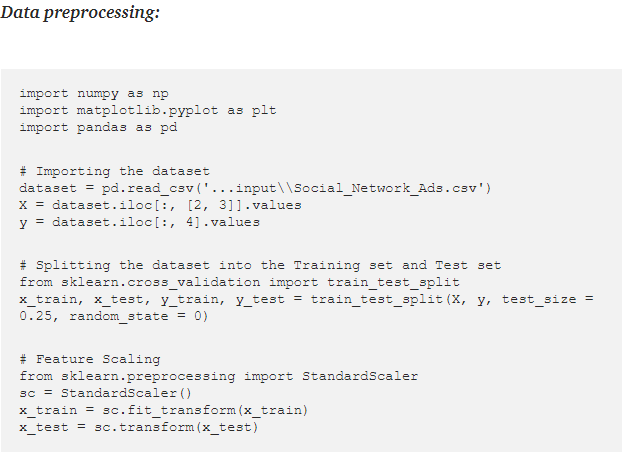

**Model building and training:**

We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

After creating a converting dataset, We created a python dictionary with parameters and their values. Accuracy of your model totally depends on the values you provide to parameters.

In the end block of code, We simply trained model with 100 iterations.

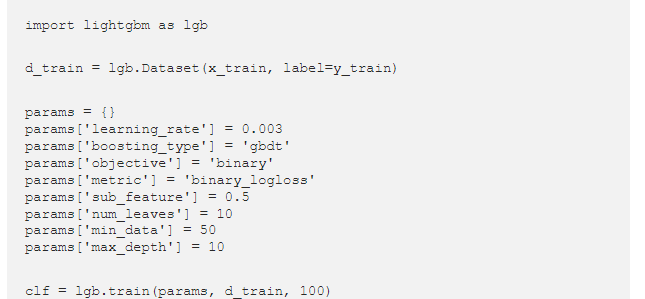

**Few things to notice in parameters:**

* Used ‘binary’ as objective(remember this is classification problem)
* Used ‘binary_logloss’ as metric(same reason, binary classification problem)
* ‘num_leaves’=10 (as it is small data)
* ‘boosting type’ is gbdt, we are implementing gradient boosting(you can try random forest)

**Model prediction:**

we just need to write a line for predictions.

Output will be a list of probabilities. I converted probabilities to binary prediction keeping threshold=0.5

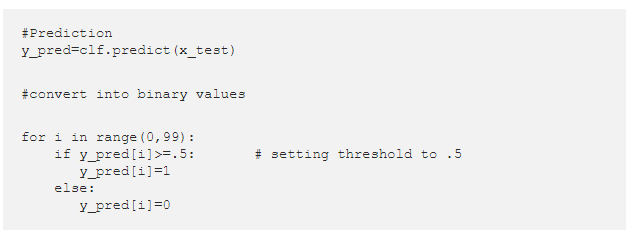

**Results:**

We can check results either using confusion matrix or directly calculating accuracy

**Code:**

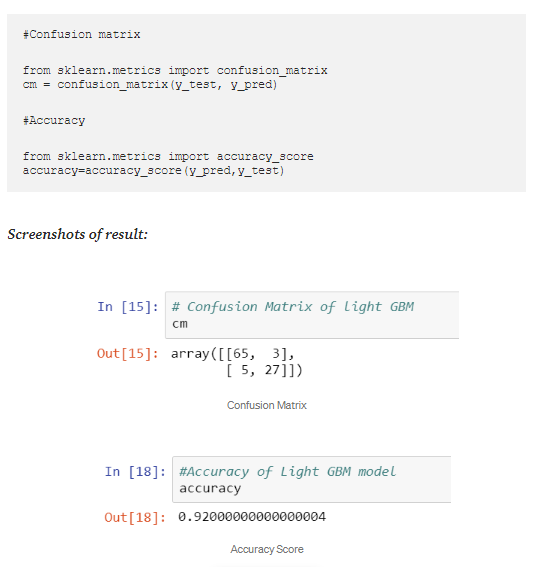

Many of you must be thinking that I used smaller dataset and still my model has 92% accuracy. Why there is no overfitting? The simple reason is I fine tuned model parameters.

So now let’s jump into parameter fine tuning.

**Parameter Tuning:** 

Data scientists always struggle in deciding when to use which parameter? and what should be the ideal value of that parameter?

Following set of practices can be used to improve your model efficiency.

**1.num_leaves:** This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

**2.min_data_in_leaf:** Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

**3.max_depth:** You also can use max_depth to limit the tree depth explicitly.

**For Faster Speed:**

* Use bagging by setting bagging_fraction and bagging_freq
* Use feature sub-sampling by setting feature_fraction
* Use small max_bin
* Use save_binary to speed up data loading in future learning
* Use parallel learning, refer to parallel learning guide.

**For better accuracy:**

* Use large max_bin (may be slower)
* Use small learning_rate with large num_iterations
* Use large num_leaves(may cause over-fitting)
* Use bigger training data
* Try dart
* Try to use categorical feature directly

**To deal with over-fitting:**

* Use small max_bin
* Use small num_leaves
* Use min_data_in_leaf and min_sum_hessian_in_leaf
* Use bagging by set bagging_fraction and bagging_freq
* Use feature sub-sampling by set feature_fraction
* Use bigger training data
* Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
* Try max_depth to avoid growing deep tree